## Güçlü Şifrelerin Sınıflandırılması

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

pd.set_option("display.max_columns", 100)

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [2]:
df=pd.read_csv("data.csv", error_bad_lines=False,sep=",")

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [3]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
df.tail()

,password,strength
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1
669639,fxx4pw4g,1


In [5]:
df.sample(10)

,password,strength
293946,6deila,0
33267,externet88,1
64609,bikeci6,0
639913,item4137,1
286594,SR20AkTg0NAczTDk,2
241026,p160980q,1
368052,pojarat162391,1
103299,dasfdf5q5yas,1
242406,q10plus,0
208153,yTwBRIA208Q4H4nx,2


In [6]:
df.shape

(669640, 2)

In [7]:
df.columns

Index(['password', 'strength'], dtype='object')

In [8]:
df.describe()

,strength
count,669640.000000
mean,0.990196
std,0.507948
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [9]:
df.corr()

,strength
strength,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [11]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [14]:
df.isnull().sum()

password    0
strength    0
dtype: int64

In [15]:
df.strength.value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

<AxesSubplot:xlabel='strength', ylabel='count'>

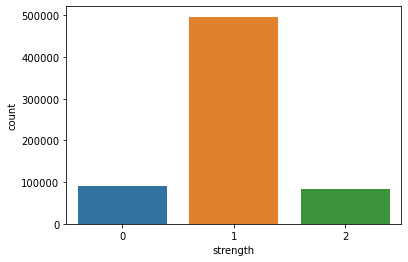

In [16]:
sns.countplot(df['strength'])

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
x=df["password"]

In [19]:
y=df["strength"]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
x_train.shape

(535711,)

In [22]:
x_test.shape

(133928,)

In [23]:
y_train.shape

(535711,)

In [24]:
y_test.shape

(133928,)

In [25]:
vect=CountVectorizer(analyzer="char")


In [26]:
x_train_dtm=vect.fit_transform(x_train,y_train)


In [27]:
x_test_dtm=vect.transform(x_test)


In [28]:
x_train_dtm.shape,x_test_dtm.shape

((535711, 146), (133928, 146))

In [29]:
m=MultinomialNB()
model=m.fit(x_train_dtm,y_train)
m_predict=m.predict(x_test_dtm)
accuracy_score(y_test,m_predict)

0.7793590585986501

In [30]:
b=BernoulliNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)
accuracy_score(y_test,b_predict)

0.8135714712382773

In [31]:
L=LogisticRegression()
model=L.fit(x_train_dtm,y_train)
L_predict=L.predict(x_test_dtm)
accuracy_score(y_test,L_predict)

0.999805865838361

In [32]:
#g=GradientBoostingClassifier()
#model=g.fit(x_train_dtm,y_train)
#g_predict=g.predict(x_test_dtm)
